In [6]:
# 1) Setup: unzip pack (if uploaded) and install libs including pyspark
# Upload BankingProjectsPack_10k.zip to Colab files pane before running.

# Unzip to /content (safe to re-run)
!apt-get install unzip -qq
import os, pathlib, sys
ZIP_PATH = "/content/BankingProjectsPack_10k.zip"
if pathlib.Path(ZIP_PATH).exists():
    !unzip -o /content/BankingProjectsPack_10k.zip -d /content/
else:
    print("Zip not found at", ZIP_PATH, "- skip unzip if you uploaded the folder already.")

# Install Python dependencies (PySpark included)
# Note: pyspark is large; install may take ~1-2 minutes
!pip install -q numpy pandas matplotlib scikit-learn nltk vaderSentiment python-pptx xgboost pyspark

# Confirm where project folders are
print("Contents of /content:")
!ls -lah /content | sed -n '1,200p'


Archive:  /content/BankingProjectsPack_10k.zip
  inflating: /content/requirements.txt  
  inflating: /content/README.md      
  inflating: /content/1_Fraud_Anomaly_Detection/analysis.py  
  inflating: /content/1_Fraud_Anomaly_Detection/README.md  
  inflating: /content/1_Fraud_Anomaly_Detection/slides.txt  
  inflating: /content/1_Fraud_Anomaly_Detection/data/dataset.csv  
  inflating: /content/2_Operational_Sentiment_NLP/analysis.py  
  inflating: /content/2_Operational_Sentiment_NLP/README.md  
  inflating: /content/2_Operational_Sentiment_NLP/slides.txt  
  inflating: /content/2_Operational_Sentiment_NLP/data/dataset.csv  
  inflating: /content/3_ESG_Portfolio_Scoring/analysis.py  
  inflating: /content/3_ESG_Portfolio_Scoring/README.md  
  inflating: /content/3_ESG_Portfolio_Scoring/slides.txt  
  inflating: /content/3_ESG_Portfolio_Scoring/data/dataset.csv  
  inflating: /content/4_Credit_Risk_Stress_Test/analysis.py  
  inflating: /content/4_Credit_Risk_Stress_Test/README.md  
  

In [7]:
import pathlib, os

# Auto-detect where the projects were unzipped
c1 = pathlib.Path("/content/BankingProjectsPack_10k")
c2 = pathlib.Path("/content")
BASE = None
if c1.exists():
    BASE = c1
else:
    # maybe you unzipped directly into /content (folders at /content/1_Fraud_Anomaly_Detection)
    # Check typical project folder names
    if (pathlib.Path("/content/1_Fraud_Anomaly_Detection")).exists():
        BASE = pathlib.Path("/content")
    else:
        # Not found - try Drive option
        print("Projects not on /content. If you put them in Google Drive, mount drive (see instructions).")
        BASE = None

print("Detected base path:", BASE)


Detected base path: /content


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package java-common.
(Reading database ... 121229 files and directories currently installed.)
Preparing to unpack .../java-common_0.72build2_all.deb ...
Unpacking java-common (0.72build2) ...
Selecting previously unselected package libpcsclite1:amd64.
Preparing to unpack .../libpcsclite1_1.9.5-3ubuntu1_amd64.deb ...
Unpacking libpcsclite1:amd64 (1.9.5-3ubuntu1) ...
Selecting previously unselected package openjdk-11-jre-headless:amd64.
Preparing to unpack .../openjdk-11-jre-headless_11.0.28+6-1ubuntu1~22.04.1_amd64.deb ...
Unpacking openjdk-11-jre-headless:amd64 (11.0.28+6-1ubuntu1~22.04.1) ...
Selecting previously unselected package ca-certificates-java.
Preparing to unpack .../ca-certificates-java_20190909ubuntu1.2_all.deb ...
Unpacking ca-certificates-java (20190909u

In [13]:
sdf = spark.read.csv("/content/1_Fraud_Anomaly_Detection/data/dataset.csv", header=True, inferSchema=True)
sdf.show(5)


+--------+-------+--------------------+------+-------------+-------+------+----+----------------+-----------+
|   tx_id|user_id|           timestamp|amount|merchant_type|country|device|hour|is_international|label_fraud|
+--------+-------+--------------------+------+-------------+-------+------+----+----------------+-----------+
|T0000000|  25795|2025-11-07 02:37:...| 70.34|       travel|     IN|mobile|  19|               0|          1|
|T0000001|  10860|2025-10-15 14:42:...| 46.14|   online_sub|     AE|   web|   2|               1|          0|
|T0000002|  48158|2025-11-03 04:24:...| 52.22|  electronics|     IN|   atm|   7|               0|          0|
|T0000003|  21284|2025-11-07 21:38:...|  6.07|         fuel|     IN|   web|   7|               0|          0|
|T0000004|  16265|2025-11-05 21:59:...|  4.06|   online_sub|     US|   pos|  23|               1|          0|
+--------+-------+--------------------+------+-------------+-------+------+----+----------------+-----------+
only showi

Project path: /content/1_Fraud_Anomaly_Detection
Spark version: 3.5.1
Loaded rows: 10000


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

ROC AUC: 0.6466368721639807
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      2324
           1       0.00      0.00      0.00       176

    accuracy                           0.93      2500
   macro avg       0.46      0.50      0.48      2500
weighted avg       0.86      0.93      0.90      2500

Saved: /content/1_Fraud_Anomaly_Detection/outputs/roc_curve.png


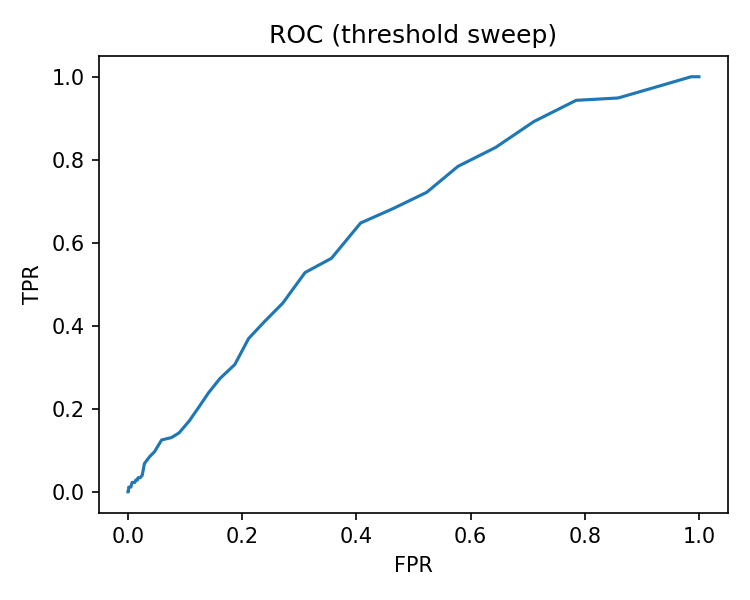

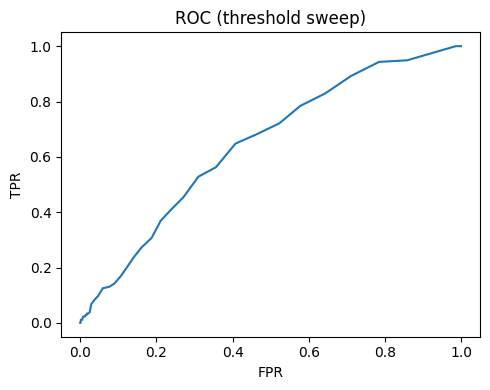

In [15]:
# FRAUD project (1_Fraud_Anomaly_Detection)
from pathlib import Path
import os
BASE = Path("/content/BankingProjectsPack_10k") if Path("/content/BankingProjectsPack_10k").exists() else Path("/content")
PROJ = BASE / "1_Fraud_Anomaly_Detection"
print("Project path:", PROJ)
assert PROJ.exists(), "Project folder not found. Adjust BASE or upload project."

# ---------------- PySpark ingest (optional, fast) ----------------
use_spark = True   # set False to skip spark and directly use pandas
if use_spark:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local[*]").appName("fraud_ingest").getOrCreate()
    print("Spark version:", spark.version)
    sdf = spark.read.csv(str(PROJ/"data"/"dataset.csv"), header=True, inferSchema=True)
    # Basic cleaning / cast
    sdf = sdf.withColumn("timestamp", sdf["timestamp"].cast("timestamp"))
    # Write out a cleaned CSV back to project folder for pandas
    cleaned_csv = PROJ/"data"/"dataset_cleaned.csv"
    sdf.toPandas().to_csv(cleaned_csv, index=False)
    csv_path = cleaned_csv
else:
    csv_path = PROJ/"data"/"dataset.csv"

# ---------------- Pandas + sklearn modeling ----------------
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

df = pd.read_csv(csv_path, parse_dates=["timestamp"])
print("Loaded rows:", len(df))
# drop timestamp to avoid dtype issue; use hour already present
y = df["label_fraud"]
X = df.drop(columns=["label_fraud","tx_id","timestamp"])

# get categorical and numeric
cat_cols = ["merchant_type","country","device"]
num_cols = [c for c in X.columns if c not in cat_cols]

from sklearn.preprocessing import OneHotEncoder

# ✅ Compatible with all sklearn versions
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)  # newer versions
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)         # older fallback

pre = ColumnTransformer([
    ("cat", ohe, cat_cols),
    ("num", "passthrough", num_cols)
])

pipe = Pipeline([
    ("pre", pre),
    ("clf", LogisticRegression(max_iter=300))
])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
pipe.fit(X_train, y_train)
proba = pipe.predict_proba(X_test)[:,1]
preds = (proba >= 0.5).astype(int)

print("ROC AUC:", roc_auc_score(y_test, proba))
print(classification_report(y_test, preds))

# Save ROC-like curve
ths = np.linspace(0,1,200)
tpr, fpr = [], []
from sklearn.metrics import confusion_matrix
for t in ths:
    p = (proba >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, p).ravel()
    tpr.append(tp/(tp+fn) if (tp+fn)>0 else 0)
    fpr.append(fp/(fp+tn) if (fp+tn)>0 else 0)

out_dir = PROJ/"outputs"
out_dir.mkdir(parents=True, exist_ok=True)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr)
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.title("ROC (threshold sweep)")
plt.tight_layout()
png = out_dir/"roc_curve.png"
plt.savefig(png, dpi=150)
print("Saved:", png)

# preview inline
from IPython.display import Image, display
display(Image(filename=str(png)))


Project path: /content/2_Operational_Sentiment_NLP
Accuracy: 1.0
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       979
     neutral       1.00      1.00      1.00       501
    positive       1.00      1.00      1.00      1020

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



/tmp/ipython-input-1370447397.py:39: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  pivot = trend.pivot(index="week", columns="department", values="rating").fillna(method="ffill")


Saved: /content/2_Operational_Sentiment_NLP/outputs/sentiment_trend.png


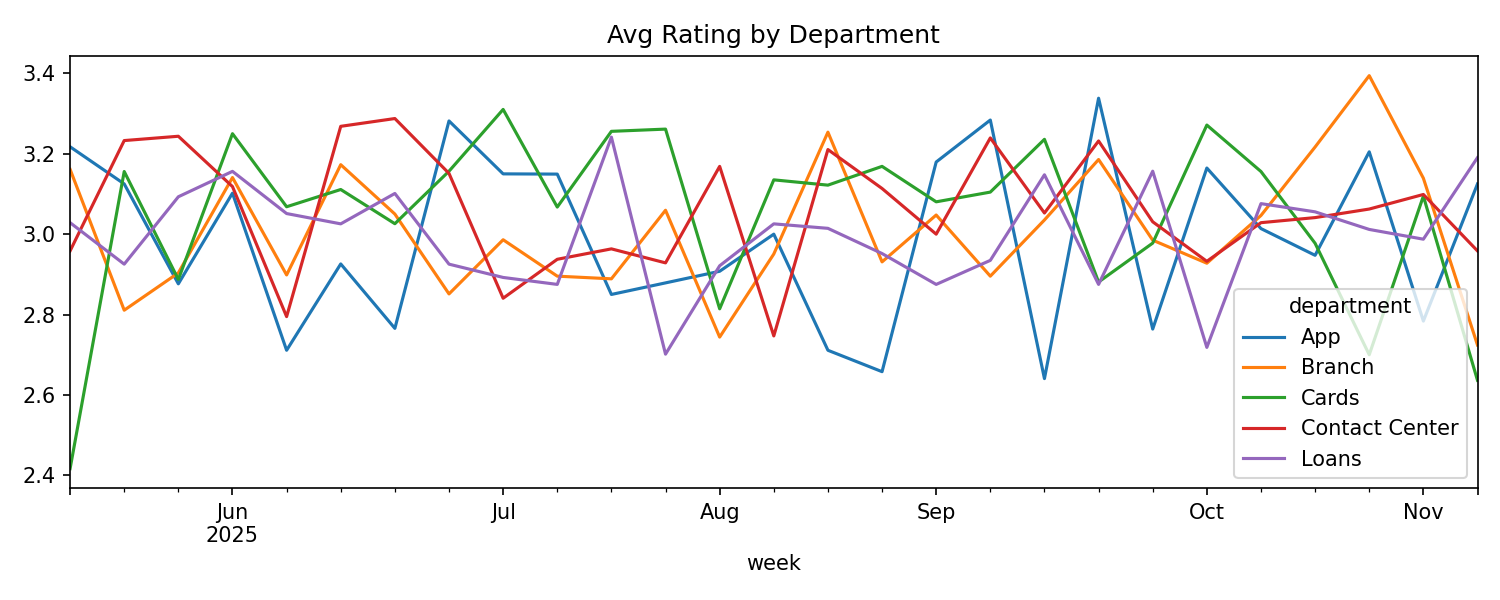

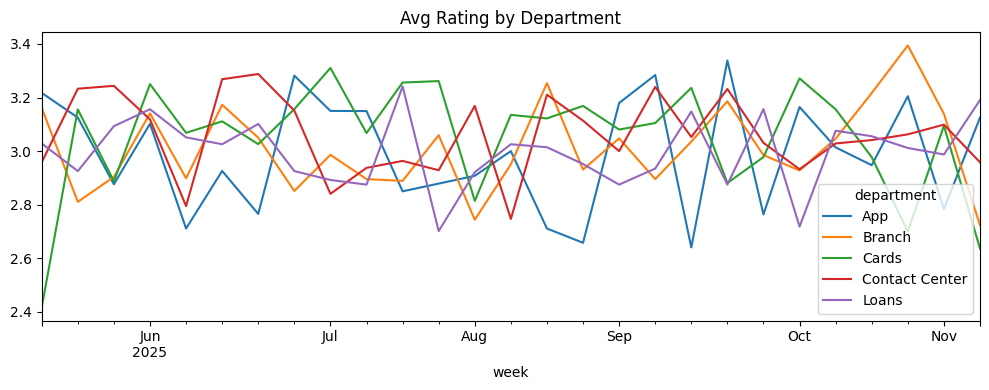

In [16]:
# SENTIMENT project (2_Operational_Sentiment_NLP)
from pathlib import Path
BASE = Path("/content/BankingProjectsPack_10k") if Path("/content/BankingProjectsPack_10k").exists() else Path("/content")
PROJ = BASE/"2_Operational_Sentiment_NLP"
print("Project path:", PROJ)
assert PROJ.exists()

# Optional PySpark ingest
use_spark = True
csv_path = PROJ/"data"/"dataset.csv"
if use_spark:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local[*]").appName("sentiment_ingest").getOrCreate()
    sdf = spark.read.csv(str(csv_path), header=True, inferSchema=True)
    df = sdf.toPandas()
else:
    import pandas as pd
    df = pd.read_csv(csv_path, parse_dates=["date"])

# Prepare
df["label"] = df["sentiment"].astype(str)
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

train, test = train_test_split(df, test_size=0.25, random_state=42, stratify=df["label"])
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("clf", LogisticRegression(max_iter=300))])
pipe.fit(train["review_text"], train["label"])
preds = pipe.predict(test["review_text"])
print("Accuracy:", accuracy_score(test["label"], preds))
print(classification_report(test["label"], preds))

# Trend by week (pandas)
df["week"] = pd.to_datetime(df["date"]).dt.to_period("W").apply(lambda r: r.start_time)
trend = df.groupby(["week","department"])["rating"].mean().reset_index()
pivot = trend.pivot(index="week", columns="department", values="rating").fillna(method="ffill")
out_dir = PROJ/"outputs"; out_dir.mkdir(parents=True, exist_ok=True)
ax = pivot.plot(figsize=(10,4))
ax.set_title("Avg Rating by Department")
plt.tight_layout()
png = out_dir/"sentiment_trend.png"
plt.savefig(png, dpi=150)
print("Saved:", png)
from IPython.display import Image, display
display(Image(str(png)))


Project path: /content/3_ESG_Portfolio_Scoring


/tmp/ipython-input-3781493222.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  asset_scores = df.groupby(["ticker","sector"]).apply(lambda g: (g["ESG_score"]*g["weight_norm"]).sum()).reset_index(name="weighted_score")


Saved: /content/3_ESG_Portfolio_Scoring/outputs/sector_esg.png


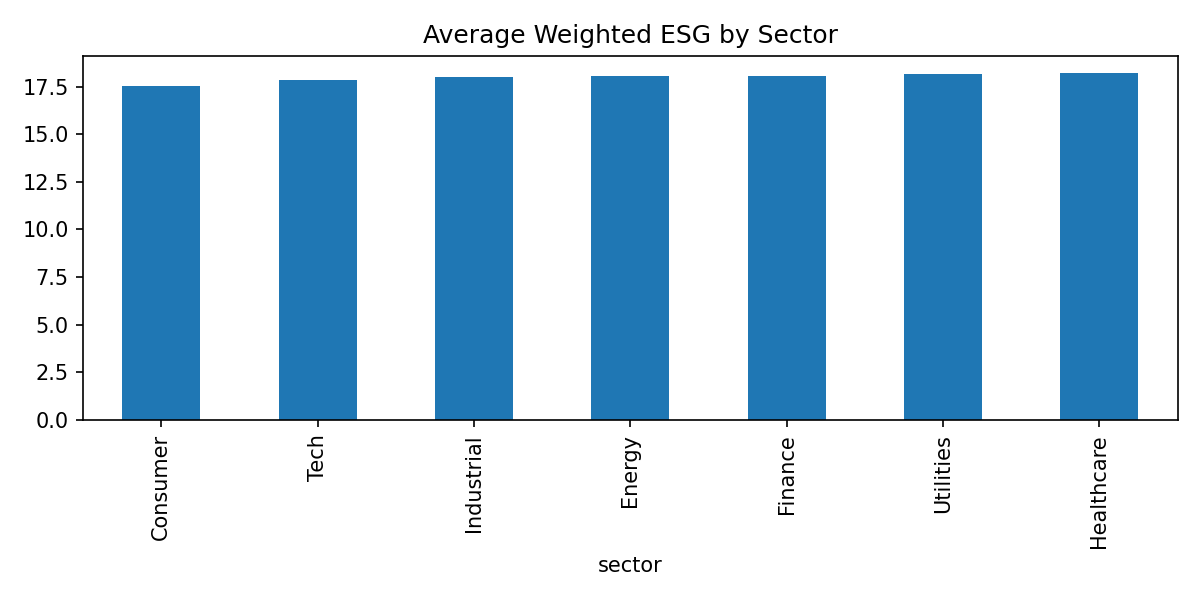

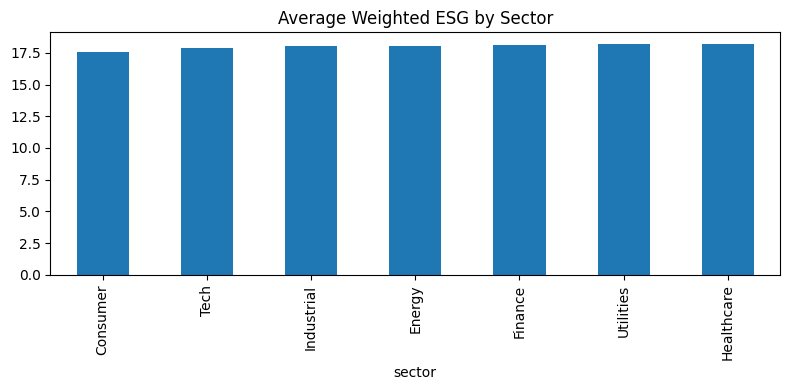

In [17]:
# ESG project (3_ESG_Portfolio_Scoring)
from pathlib import Path
BASE = Path("/content/BankingProjectsPack_10k") if Path("/content/BankingProjectsPack_10k").exists() else Path("/content")
PROJ = BASE/"3_ESG_Portfolio_Scoring"
print("Project path:", PROJ); assert PROJ.exists()

# Use spark for heavy aggregation if you want
use_spark = True
if use_spark:
    from pyspark.sql import SparkSession
    spark = SparkSession.builder.master("local[*]").appName("esg_ingest").getOrCreate()
    sdf = spark.read.csv(str(PROJ/"data"/"dataset.csv"), header=True, inferSchema=True)
    df = sdf.toPandas()
else:
    import pandas as pd
    df = pd.read_csv(PROJ/"data"/"dataset.csv")

# Compute ESG
df["ESG_score"] = 0.4*df["E_score"] + 0.3*df["S_score"] + 0.3*df["G_score"]
asset_scores = df.groupby(["ticker","sector"]).apply(lambda g: (g["ESG_score"]*g["weight_norm"]).sum()).reset_index(name="weighted_score")
out_dir = PROJ/"outputs"; out_dir.mkdir(parents=True, exist_ok=True)
asset_scores.to_csv(out_dir/"asset_scores.csv", index=False)
portfolio_score = (df["ESG_score"]*df["weight_norm"]).sum()
with open(out_dir/"portfolio_score.txt","w") as f: f.write(f"Portfolio ESG Weighted Score: {portfolio_score:.2f}")

# Plot sector average
import matplotlib.pyplot as plt
sector_avg = asset_scores.groupby("sector")["weighted_score"].mean().sort_values()
plt.figure(figsize=(8,4))
sector_avg.plot(kind="bar")
plt.title("Average Weighted ESG by Sector"); plt.tight_layout()
png = out_dir/"sector_esg.png"
plt.savefig(png, dpi=150)
print("Saved:", png)
from IPython.display import Image, display
display(Image(str(png)))


Project path: /content/4_Credit_Risk_Stress_Test
Saved: /content/4_Credit_Risk_Stress_Test/outputs/loss_dist_base.png
Saved: /content/4_Credit_Risk_Stress_Test/outputs/loss_dist_mild_recession.png
Saved: /content/4_Credit_Risk_Stress_Test/outputs/loss_dist_severe_recession.png
Saved summary.csv


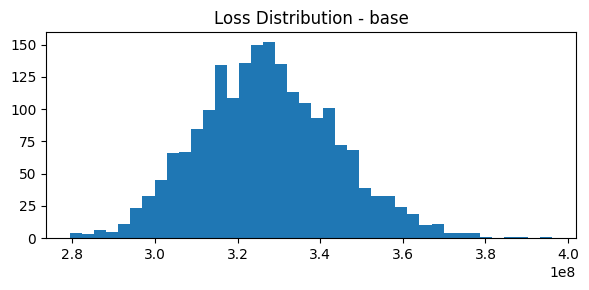

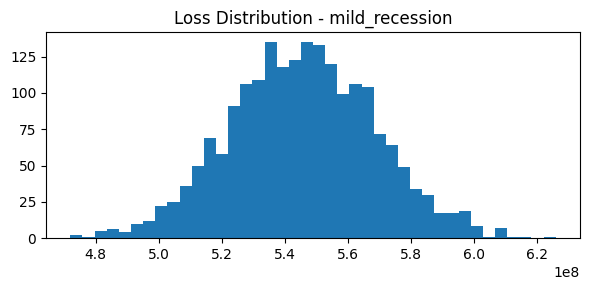

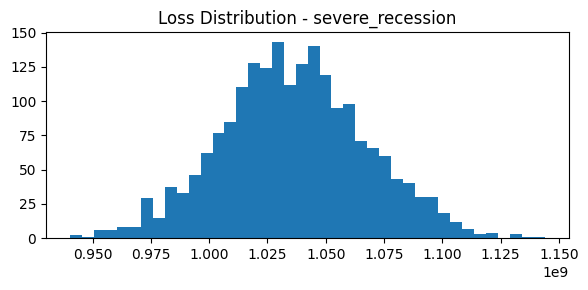

In [18]:
# CREDIT RISK project (4_Credit_Risk_Stress_Test)
from pathlib import Path
BASE = Path("/content/BankingProjectsPack_10k") if Path("/content/BankingProjectsPack_10k").exists() else Path("/content")
PROJ = BASE/"4_Credit_Risk_Stress_Test"
print("Project path:", PROJ); assert PROJ.exists()

import pandas as pd, numpy as np
df = pd.read_csv(PROJ/"data"/"dataset.csv")

scenarios = {
    "base": {"PD_mult":1.0, "LGD_add":0.0},
    "mild_recession": {"PD_mult":1.5, "LGD_add":0.05},
    "severe_recession": {"PD_mult":2.5, "LGD_add":0.12}
}

n_sims = 2000
out_dir = PROJ/"outputs"; out_dir.mkdir(parents=True, exist_ok=True)
results = {}
import matplotlib.pyplot as plt
for name, sc in scenarios.items():
    losses = []
    for _ in range(n_sims):
        PD = np.clip(df["PD_base"]*sc["PD_mult"], 0, 1)
        LGD = np.clip(df["LGD"]+sc["LGD_add"], 0, 1)
        default = np.random.rand(len(df)) < PD
        loss = (df["EAD"]*LGD*default).sum()
        losses.append(loss)
    arr = np.array(losses); results[name] = arr
    plt.figure(figsize=(6,3))
    plt.hist(arr, bins=40)
    plt.title(f"Loss Distribution - {name}")
    plt.tight_layout()
    png = out_dir/f"loss_dist_{name}.png"
    plt.savefig(png, dpi=150)
    print("Saved:", png)

# summary
summary = []
for name, arr in results.items():
    summary.append({"scenario":name, "EL_mean":arr.mean(), "P95":np.percentile(arr,95), "P99":np.percentile(arr,99)})
import pandas as pd
pd.DataFrame(summary).to_csv(out_dir/"summary.csv", index=False)
print("Saved summary.csv")


Project path: /content/5_CBDC_Velocity_Monitoring


/tmp/ipython-input-4282022867.py:9: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df["hour"] = df["timestamp"].dt.floor("H")


Saved: /content/5_CBDC_Velocity_Monitoring/outputs/cbdc_hourly.png
Saved region_day_matrix.csv


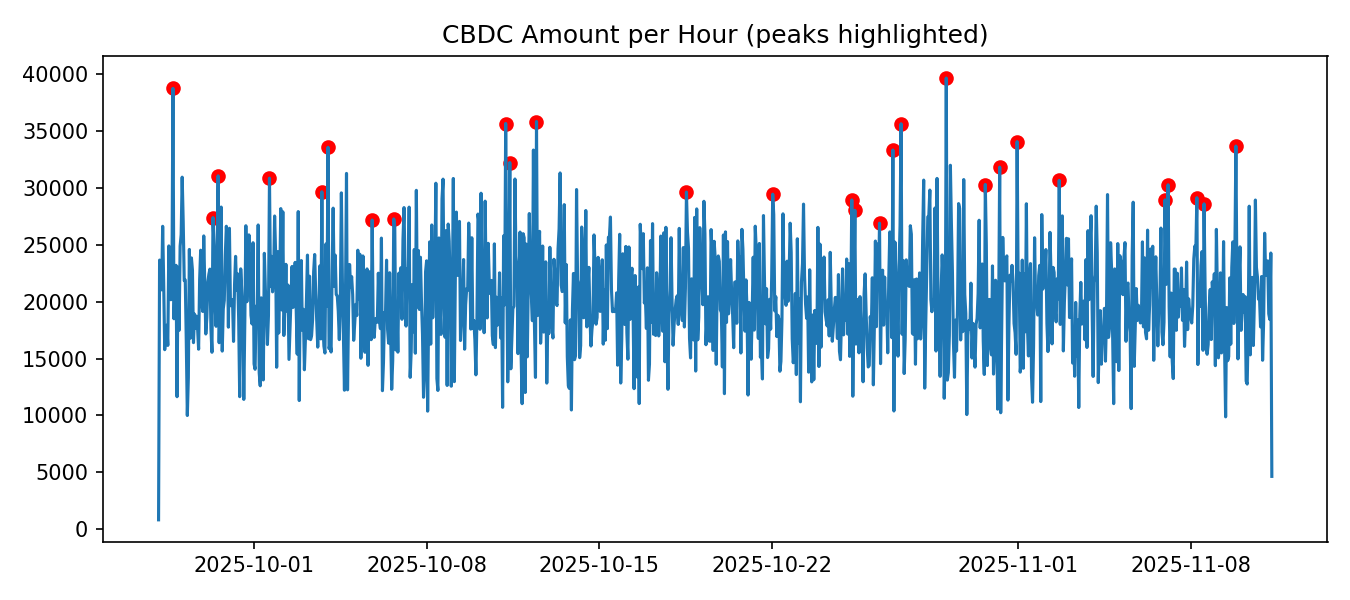

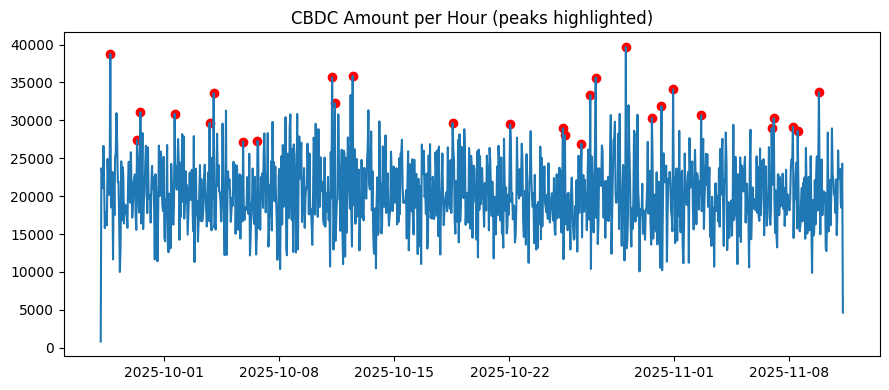

In [19]:
# CBDC project (5_CBDC_Velocity_Monitoring)
from pathlib import Path
BASE = Path("/content/BankingProjectsPack_10k") if Path("/content/BankingProjectsPack_10k").exists() else Path("/content")
PROJ = BASE/"5_CBDC_Velocity_Monitoring"
print("Project path:", PROJ); assert PROJ.exists()

import pandas as pd
df = pd.read_csv(PROJ/"data"/"dataset.csv", parse_dates=["timestamp"])
df["hour"] = df["timestamp"].dt.floor("H")
hourly = df.groupby("hour")["amount"].sum().reset_index()
hourly["roll_mean"] = hourly["amount"].rolling(24, min_periods=6).mean()
hourly["roll_std"] = hourly["amount"].rolling(24, min_periods=6).std()
hourly["z"] = (hourly["amount"] - hourly["roll_mean"]) / hourly["roll_std"]
hourly["peak"] = (hourly["z"] > 2).astype(int)

out_dir = PROJ/"outputs"; out_dir.mkdir(parents=True, exist_ok=True)
import matplotlib.pyplot as plt
plt.figure(figsize=(9,4))
plt.plot(hourly["hour"], hourly["amount"])
plt.scatter(hourly.loc[hourly["peak"]==1,"hour"], hourly.loc[hourly["peak"]==1,"amount"], color='red')
plt.title("CBDC Amount per Hour (peaks highlighted)")
plt.tight_layout()
png = out_dir/"cbdc_hourly.png"
plt.savefig(png, dpi=150)
print("Saved:", png)

pivot = df.pivot_table(index=df["timestamp"].dt.date, columns="region", values="amount", aggfunc="sum").fillna(0)
pivot.to_csv(out_dir/"region_day_matrix.csv")
print("Saved region_day_matrix.csv")
from IPython.display import Image, display
display(Image(str(png)))


In [20]:
from google.colab import drive
drive.mount('/content/drive')
# Set BASE to the Drive path where the pack lives (update the path below)
BASE = Path("/content/drive/MyDrive/BankingProjectsPack_10k")
# Then run the project cells above with PROJ = BASE/'1_Fraud_Anomaly_Detection' etc.


Mounted at /content/drive
